# Árboles de decisión y k-vecinos más cercanos

En este notebook trabajaremos con los dos modelos fundamentales de Machine Learning, Árboles de Decisión y k-vecinos más cercanos (kNN, k-nearest neighbors). Para ello, seguiremos utilizando el Iris Dataset y, luego, usaremos uno nuevo, el dataset de Titanic. El notebook está dividido en tres partes: 

1. kNN con Iris Dataset.
1. Construcción de un árbol de decisión *a mano*. Cálculo de Impureza y Ganancia Gini.
1. Titanic + Árboles de Decisión en Scikit-Learn.


## 1. kNN: k-Nearest Neighbors - Challenge

Para comenzar, vamos a trabajar con un dataset que ya conocemos, el de Iris. El flujo de trabajo será exactamente igual que el que hicieron en el notebook anterior para el `DecisionTreeClassifier`, pero en lugar de usar ese clasificador, deberán usar uno de vecinos más cercanos. Busca en la documentación de Scikit-Learn cómo debes importar ese clasificador. Recuerda que, debido a la implementación orientada a objetos de Scikit-Learn, **todos los modelos se entrenan y se usan de la misma forma**.

1. Cargamos el dataset. Esta sección va de regalo.

## 2. Construcción de un árbol de decisión *a mano*

Es raro que, como Data Scientist, tengas que programar un modelo, al menos en esta etapa de tu carrera. En general, existen muchas librerías con implementaciones de diferente métodos al alcance de la mano. Sin embargo, hacer una implementación rápida, aunque sea sencilla, ayuda comprender mejor algunos detalles. 

En esta sección vamos a programar la consulta de un árbol de decisión y, luego, calcular algunas impurezas Gini. Todo esto lo implementa Scikit-Learn de forma automática, pero hacerlo te ayudará a comprender mejor los árboles de decisión.

En la bitácora 07, Seaborn, te mencionamos brevemente el dataset de Titanic, que podías mirar en la competencia Kaggle Titanic: [Machine Learning from Disaster](https://www.kaggle.com/c/titanic). Hoy vamos a empezar a utilizarlo. En la descarga te dejamos una versión simplificada y filtrada de este dataset. Qué representa cada atributo puedes mirarlo en la página de Kaggle, pero te aclaramos que la columna `Sex`, en nuestro caso, refiere al género, donde `0` es hombre y `1` es mujer.

**Ejercicio:** Carga el dataset de Titanic y tomate un rato para estudiar sus características. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS_Bitácora_12_Titanic.csv')

Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#sns.heatmap(data)
#sns.pairplot(data)
#sns.catplot(x='Survived',y='Age',hue='Sex',data=data)
#reemplazo binario por categoria en sexo
#data.loc[data['Sex']== 1,'Sex'] = 'Mujer'
#data.loc[data['Sex']== 0,'Sex'] = 'Hombre'
print(data.head())
#print(data.describe(include='all'))


   Survived  Pclass     Sex   Age  SibSp  Parch
0         0       3  Hombre  22.0      1      0
1         1       1   Mujer  38.0      1      0
2         1       3   Mujer  26.0      0      0
3         1       1   Mujer  35.0      1      0
4         0       3  Hombre  35.0      0      0


### 2.1 Árbol de decisión *a mano*

Ahora sí, manos a la obra.


**NOTA**: LEER HASTA EL FINAL ANTES DE MODIFICAR EL CÓDIGO.

En primer lugar, vamos a definir algunas funciones que serán de utilidad.

* La función `accuracy`, dada las etiquetas que ustedes predigan y las etiquetas reales, calcula la medida de performance, en este caso, la exactitud. **No la tienes que modificar, pero presta atención a su implementación**.

In [ ]:
def accuracy(y_predicted, y_real):
    mask = np.array(y_predicted) == np.array(y_real)
    return mask.sum()/len(y_real) #el acuracy es el total de predicho que es igual al real sobre la cantidad de elementos totales

* La función `predict_instance`, dada una instancia x con sus atributos, predice si sobrevivió o no. **Es la única función que tendrás que modificar**.

In [ ]:
def predict_instance(x): #los predictores son las X
    '''
    Modificar las siguientes líneas de codigo. 
    Este será su algoritmo algoritmo para predecir si sobrevivirá o no por instancia.
    La variable prediction debe contener la etiqueta 0 o 1 
    
    Algunas opciones son: predecir que nadie sobrevivio, que todos sobrevivieron,
    predecir al azar, y usar lo aprendido cuando exploramos el dataset de Titanic
    '''
    prediction = 0
    #predecir las instancias, defino el modelo aca.
    ### UNA POSIBLE FORMA DE EMPEZAR:
    if (x.Age < 12):
         prediction = 1
    else:
         prediction = 0
    return prediction

* Por último, la función `predict` toma todo las instancias `X` y, usando la función que definieron antes, predice para cada una de ellas si sobrevivió o no. **No la tienes que modificar, pero presta atención a su implementación**.

In [ ]:
def predict(X):
    y_predicted = []
    for x in X.itertuples():  #itertuples crea de la lista X las tuplas 
        y_i = predict_instance(x)  #posición donde está la predicción
        y_predicted.append(y_i)    #agrega el y predicho en la posición anterior (osea cuando es 1)
    return y_predicted

**Consigna**

1. Cargar el dataset de Titanic y separar en una variable `X` los atributos que usarás para predecir, y en una variable `y` la etiqueta que quieres predecir. En este caso, si sobrevivió o no.

In [ ]:
import pandas as pd
import numpy as np

titanic=pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS_Bitácora_12_Titanic.csv')

#titanic.loc[titanic['Sex']==1,'Sex_cat'] = 'Mujer'
#titanic.loc[titanic['Sex']==0,'Sex_cat'] = 'Hombre'
print(titanic.head())
#Survived  Pclass     Sex   Age  SibSp  Parch
#le saco la etiqueta
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']


   Survived  Pclass  Sex   Age  SibSp  Parch
0         0       3    0  22.0      1      0
1         1       1    1  38.0      1      0
2         1       3    1  26.0      0      0
3         1       1    1  35.0      1      0
4         0       3    0  35.0      0      0


2. Usar los datos `X` para predecir si los pasajeros sobrevivieron o no utilizando la función `predict`. **No tienes que modificar ninguna de las funciones por ahora**.

In [ ]:
y_pred = predict(X)
print(y_pred)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

3. Calcula la medida de performance entre las etiquetas reales `y` y las etiquetas predichas `y_pred` con la función `accuracy`.

In [ ]:
Ac=accuracy(y_pred,y) #y etiquetas reales e  y_pred las etiquetas predichas
print(Ac) #esta mal hecho el predictor(cuando hago los condicionales ...revisar)

from sklearn.metrics import accuracy_score
Ac=accuracy_score(y_pred,y)
print(Ac)

0.6078431372549019
0.6078431372549019


In [ ]:
#help(accuracy_score)

4. Calcula la matriz de confusión con Scikit-Learn.

[[395  29]
 [251  39]]


Text(33.0, 0.5, 'Sobrevivio (Predicho)')

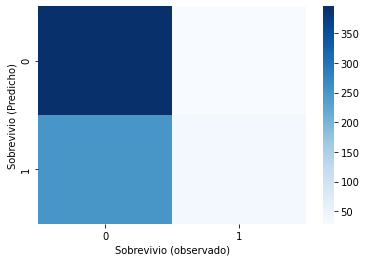

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

print(confusion_matrix(y,y_pred))
sns.heatmap(confusion_matrix(y,y_pred),cmap=plt.cm.Blues)
plt.xlabel('Sobrevivio (observado)')
plt.ylabel('Sobrevivio (Predicho)')

#[[395  29]
# [251  39]] #esto es un sesgo del modelo! 
#en el titanic la mayoria no sobrevivio, el modelo tiende a favorecer a los que no sobrevivieron a los que si.
#puedo modificar con más variables predictivas y la muestra que le doy(si no tengo más datos tengo que modificar los predictores que me generen mejora el acuracy (que aporten, den importancia) ).


**Ejercicio**: modifica `predict_instance` de forma tal de mejorar el resultado recién obtenido. Tal vez te sirva de pista, para arrancar, la famosa frase, "mujeres y niños primero".



In [ ]:
#terminar
def predict_instance(x): #los predictores son las X
    '''
    Modificar las siguientes líneas de codigo. 
    Este será su algoritmo algoritmo para predecir si sobrevivirá o no por instancia.
    La variable prediction debe contener la etiqueta 0 o 1 
    
    Algunas opciones son: predecir que nadie sobrevivio, que todos sobrevivieron,
    predecir al azar, y usar lo aprendido cuando exploramos el dataset de Titanic
    '''
    prediction = 0
    #predecir las instancias, defino el modelo aca.
    ### UNA POSIBLE FORMA DE EMPEZAR:
    if (x.Age < 12): #niños
         prediction = 1
    elif (x.Age>12) and (x.Sex=='Mujer'):
         prediction = 1
    else:
         prediction = 0
    return prediction

**Para pensar:** las performances asociadas a predecir todos `0` (nadie sobrevivió), todos `1` (todos sobrevivieron), y predecir al azar son muy importantes para evaluar nuestro trabajo. ¿Por qué?

### 2.2 Cálculo de Impureza y Ganancia Gini

Ahora vamos a calcular cuán buena es la *pregunta* del género y clase para separar las muestras usando la impureza Gini. Para ello:

**Ejercicio:** calcula la impureza inicial del dataset. Ayuda: recuerda que en la variable `y` ya separaste las etiquetas. Si es un objeto de Pandas, tal vez la función `value_counts()` puede ser útil. 

In [ ]:
import pandas as pd
muestras_neg, muestras_pos = y.value_counts()
N = len(y)
gini_inicial = 1 - (muestra_neg/N)**2 - (muestras_pos/N)**2

NameError: ignored

In [ ]:
print(gini_inicial)

**Ejercicio:** calcula la impureza Gini luego de separar por el género. Recuerda que tienes que calcular la impureza en dos hojas - una correspondiente a género masculino y otra al femenino - y luego hacer un promedio ponderado. Para eso, puede ser conveniente crear una máscara y reciclar código anterior.

In [ ]:
mascara = X.Sex==1
y_female = y[mascara]
y_male = y[mascara==0]
len(y_female)+len(y_male)-len(y)

0

In [ ]:
# gini mujer
mascara = titanic.Sex == 1
y_female = y[mascara]

muestras_neg, muestras_pos = y_female.value_counts()
N = len(y_female)
gini_female = 1-(muestras_neg/N)**2-(muestras_pos/N)**2
print(gini_female)


0.37016485371618146


In [ ]:
# gini hombre
mascara = titanic.Sex == 0
y_male = y[mascara]

muestras_neg, muestras_pos = y_male.value_counts()
N =len(y_male)
gini_male = 1-(muestras_neg/N)**2-(muestras_pos/N)**2
print(gini_male)
#gini más bajo es la categoria que más aporta. 


0.32630147800535075


In [ ]:
#el gini promedio 
print('Impureza Gini al separar por Genero:',(y_female.size*gini_female + y_male.size*gini_male)/y.size)

Impureza Gini al separar por Genero: 0.32630147800535075


**Ejercicio Opcional:** calcula la impureza Gini luego de separar por clase. Recuerda que tienes que calcular la impureza en tres hojas y luego hacer un promedio ponderado. Para eso, puede ser conveniente crear tres máscaras y reciclar código anterior.

In [ ]:
# PRIMERA CLASE
mascara = titanic.Pclass == 1
y_1 = y[mascara]

In [ ]:
muestras_neg, muestras_pos = COMPLETAR
N = COMPLETAR
gini_1 = COMPLETAR
print(gini_1)

In [ ]:
# SEGUNDA CLASE
mascara = titanic.Pclass == 2
y_2 = y[mascara]

muestras_neg, muestras_pos = COMPLETAR
N = COMPLETAR
gini_2 = COMPLETAR
print(gini_2)

In [ ]:
# COMPLETAR
print(gini_2)

In [ ]:
# TERCERA CLASE
mascara = titanic.Pclass == 3
y_3 = y[mascara]

muestras_neg, muestras_pos = COMPLETAR
N = COMPLETAR
gini_3 = COMPLETAR
print(gini_3)

In [ ]:
print('Impureza Gini al separar por clase:', (y_1.size*gini_1 + y_2.size*gini_2 + y_3.size*gini_3)/y.size)

NameError: ignored

¿Cuál tiene una mayor ganancia Gini?¿Concuerda con lo visto hasta ahora?




Para pensar: ¿cómo modificarías el código para calcular la ganancia Gini al separar por edad? Por ejemplo, al separar por mayor de 12 años y menor de 12 años.

In [ ]:
# mayor a 12
mascara = titanic.Age > 12
y_mayor = y[mascara]

muestras_neg, muestras_pos = COMPLETAR
N = COMPLETAR
gini_mayor = COMPLETAR
print(gini_mayor)


# menor a 12
mascara = titanic.Age < 12
menor = y[mascara]

muestras_neg, muestras_pos = COMPLETAR
N = COMPLETAR
gini_menor = COMPLETAR
print(gini_menor)

#ejercicio

### 3. Titanic + Árboles de Decisión en Scikit-Learn

Si todavía te quedan energías, entrena un árbol de decisión de Scikit-Learn en el dataset de Titanic. Para ello, recibla código de este notebook y del anterior. Algunas recomendaciones:
1. Experimenta con distintas profundidades y visualizar el árbol obtenidos con la función `plot_tree` del módulo `tree` de Scikit-Learn.
1. Evalúa su desempeño calculando la exactitud y viendo su matriz de confusión.
1. Observa la importancia asignada a cada atributo (`feature_importances_`). En el notebook anterior podrás encontrar el código para realizar un gráfico de barras que te puede ser útil.
1. Si seleccionas dos atributos, pueden observar las fronteras de decisión.

¿Te parece que lo obtenido concuerda con lo que esperabas?¿Qué puedes aprender de la tragedia del Titanic viendo el árbol de decisíon y la importancia de cada atributo (feature)?

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

titanic=pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS_Bitácora_12_Titanic.csv')


X=titanic.drop('Parch',axis=1)
X=titanic.drop('Survived',axis=1)
X=titanic.drop('SibSp',axis=1)

y=titanic['Survived']

def accuracy (max_depth,X,y):
    model=DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    model.fit(X,y)
    predicciones=model.predict(X)
    acurracy = accuracy_score(predicciones,y)
    return accuracy

In [ ]:

for max_depth in range(2,50):
    a=accuracy(max_depth,X,y)
    print('Para el Max_depth: ', max_depth , 'el accuracy es:', a)

Para el Max_depth:  2 el accuracy es: <function accuracy at 0x7fbc7cd99f28>
Para el Max_depth:  3 el accuracy es: <function accuracy at 0x7fbc7cd99f28>
Para el Max_depth:  4 el accuracy es: <function accuracy at 0x7fbc7cd99f28>
Para el Max_depth:  5 el accuracy es: <function accuracy at 0x7fbc7cd99f28>
Para el Max_depth:  6 el accuracy es: <function accuracy at 0x7fbc7cd99f28>
Para el Max_depth:  7 el accuracy es: <function accuracy at 0x7fbc7cd99f28>
Para el Max_depth:  8 el accuracy es: <function accuracy at 0x7fbc7cd99f28>
Para el Max_depth:  9 el accuracy es: <function accuracy at 0x7fbc7cd99f28>
Para el Max_depth:  10 el accuracy es: <function accuracy at 0x7fbc7cd99f28>
Para el Max_depth:  11 el accuracy es: <function accuracy at 0x7fbc7cd99f28>
Para el Max_depth:  12 el accuracy es: <function accuracy at 0x7fbc7cd99f28>
Para el Max_depth:  13 el accuracy es: <function accuracy at 0x7fbc7cd99f28>
Para el Max_depth:  14 el accuracy es: <function accuracy at 0x7fbc7cd99f28>
Para el

In [ ]:
#model=DecisionTreeClassifier(max_depth=max_depth, random_state=0)
#model.fit(X,y)
#predicciones=model.predict(X)
#    get_acurracy = accuracy(predicciones,y)

In [ ]:
def accuracy (max_depth,X,y):
    model=DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    model.fit(X,y)
    predicciones=model.predict(X)
    acurracy = accuracy_score(predicciones,y)
    return accuracy


NameError: ignored

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
data = pd.read_csv('/content/DS_Bitácora_12_Titanic.csv')
X = data.drop('SibSp', axis = 1)
X = X.drop('Parch', axis = 1)
X = X.drop('Survived', axis = 1)
y = data['Survived']
def accuracy(max_depth, X, y):
model = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
model.fit(X,y)
predicciones = model.predict(X)
acuracy = accuracy_score(predicciones, y)
  return accuracy
for max_depth in range(1,16):
a = accuracy(max_depth, X, y)
    print('Para Max_depth :', max_depth, ' el accuracy es: ', a)
plot_tree(model, max_depth=max_depth)